# Munich Accidents Data Analysis and Visualization

In [1]:
import warnings
warnings.filterwarnings('ignore')

#Preparing, cleaning, analyzing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Preprocessing
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## 
seed_number = 42
np.random.seed(seed_number)
tf.random.set_seed(seed_number)

## Data Preparation

In [2]:
df = pd.read_csv('./data/accidents_ds.csv')

In [3]:
df

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2022,202201,NaN,16.0,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2022,202202,NaN,14.0,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2022,202203,NaN,24.0,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2022,202204,NaN,16.0,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2022,202205,NaN,24.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2081,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0,NaN,-13.04,NaN,584.0
2082,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0,NaN,4.33,NaN,594.0
2083,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0,NaN,-8.89,NaN,596.0
2084,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0,NaN,-6.02,NaN,594.0


In [4]:
#Extracting the 5 columns
df = df [['MONATSZAHL', 'AUSPRAEGUNG', 'JAHR', 'MONAT', 'WERT']]


In [5]:
df

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
0,Alkoholunfälle,insgesamt,2022,202201,NaN
1,Alkoholunfälle,insgesamt,2022,202202,NaN
2,Alkoholunfälle,insgesamt,2022,202203,NaN
3,Alkoholunfälle,insgesamt,2022,202204,NaN
4,Alkoholunfälle,insgesamt,2022,202205,NaN
...,...,...,...,...,...
2081,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0
2082,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0
2083,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0
2084,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0


In [6]:
df.rename(columns = {'MONATSZAHL':'category', 'AUSPRAEGUNG':'accident_type', 'JAHR':'year'
          , 'MONAT':'month', 'WERT':'value'}, inplace=True)

## Data Assesment

In [7]:
#Obtaining the dataset before year 2021
df = df[df['year'] <2021]

In [8]:
#Reseting indicies after removing the data from 2021
df = df.reset_index(drop=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1911 entries, 0 to 1910
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   category       1911 non-null   object 
 1   accident_type  1911 non-null   object 
 2   year           1911 non-null   int64  
 3   month          1911 non-null   object 
 4   value          1911 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 74.8+ KB


In [10]:
df.head(15)

,category,accident_type,year,month,value
0,Alkoholunfälle,insgesamt,2020,Summe,430.0
1,Alkoholunfälle,insgesamt,2020,202001,28.0
2,Alkoholunfälle,insgesamt,2020,202002,40.0
3,Alkoholunfälle,insgesamt,2020,202003,27.0
4,Alkoholunfälle,insgesamt,2020,202004,26.0
5,Alkoholunfälle,insgesamt,2020,202005,40.0
6,Alkoholunfälle,insgesamt,2020,202006,49.0
7,Alkoholunfälle,insgesamt,2020,202007,58.0
8,Alkoholunfälle,insgesamt,2020,202008,46.0
9,Alkoholunfälle,insgesamt,2020,202009,46.0


In [11]:
df.month.unique()

array(['Summe', '202001', '202002', '202003', '202004', '202005',
       '202006', '202007', '202008', '202009', '202010', '202011',
       '202012', '201901', '201902', '201903', '201904', '201905',
       '201906', '201907', '201908', '201909', '201910', '201911',
       '201912', '201801', '201802', '201803', '201804', '201805',
       '201806', '201807', '201808', '201809', '201810', '201811',
       '201812', '201701', '201702', '201703', '201704', '201705',
       '201706', '201707', '201708', '201709', '201710', '201711',
       '201712', '201601', '201602', '201603', '201604', '201605',
       '201606', '201607', '201608', '201609', '201610', '201611',
       '201612', '201501', '201502', '201503', '201504', '201505',
       '201506', '201507', '201508', '201509', '201510', '201511',
       '201512', '201401', '201402', '201403', '201404', '201405',
       '201406', '201407', '201408', '201409', '201410', '201411',
       '201412', '201301', '201302', '201303', '201304', '20130

Here, All the values are proper Numbers except the 1st value

In [12]:
df.year.unique()

array([2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010,
       2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000],
      dtype=int64)

Year column has incorrect datatype

In [13]:

df.accident_type.unique()

array(['insgesamt', 'Verletzte und Getötete', 'mit Personenschäden'],
      dtype=object)

In [14]:
df.category.unique()

array(['Alkoholunfälle', 'Fluchtunfälle', 'Verkehrsunfälle'], dtype=object)

## Cleaning
From the above analysis I decided the following:
- Remove the row with month equal=Summe.
- Create the date column.
- Sort the values according to the date column. This step is mandatory in time-series analysis.
- Put the date column as the main index.
- Fill the month column with values from 1 to 12

### Remove the row with month equal=Summe

In [15]:
df = df[df['month'] !='Summe']

### Converting Month into Date

In [16]:
df ['date'] = [i[-2:] +'-'+ i[0:-2] for i in df['month']]

In [17]:
df['date'] = pd.to_datetime(df['date'])
df['date']

1      2020-01-01
2      2020-02-01
3      2020-03-01
4      2020-04-01
5      2020-05-01
          ...    
1906   2000-08-01
1907   2000-09-01
1908   2000-10-01
1909   2000-11-01
1910   2000-12-01
Name: date, Length: 1764, dtype: datetime64[ns]

In [18]:
df

,category,accident_type,year,month,value,date
1,Alkoholunfälle,insgesamt,2020,202001,28.0,2020-01-01
2,Alkoholunfälle,insgesamt,2020,202002,40.0,2020-02-01
3,Alkoholunfälle,insgesamt,2020,202003,27.0,2020-03-01
4,Alkoholunfälle,insgesamt,2020,202004,26.0,2020-04-01
5,Alkoholunfälle,insgesamt,2020,202005,40.0,2020-05-01
...,...,...,...,...,...,...
1906,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0,2000-08-01
1907,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0,2000-09-01
1908,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0,2000-10-01
1909,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0,2000-11-01


### Sorting values accordiing to the date

In [19]:
df.sort_values(['date'], inplace=True, ascending=True)

In [20]:
df.reset_index(drop=True, inplace=True)

### Converting the date column into index

In [21]:
df = df.set_index('date')

### Converting the Month Values to be in 1 to 12

In [22]:
df['month'] = df.index.month

Converting value into into

In [23]:
df['value'] = df['value'].astype('int')

In [24]:
df.head()

,category,accident_type,year,month,value
date,,,,,
2000-01-01,Fluchtunfälle,Verletzte und Getötete,2000,1,34
2000-01-01,Verkehrsunfälle,mit Personenschäden,2000,1,321
2000-01-01,Alkoholunfälle,insgesamt,2000,1,78
2000-01-01,Fluchtunfälle,insgesamt,2000,1,835
2000-01-01,Verkehrsunfälle,insgesamt,2000,1,3448


## Analyzing Data

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1764 entries, 2000-01-01 to 2020-12-01
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   category       1764 non-null   object
 1   accident_type  1764 non-null   object
 2   year           1764 non-null   int64 
 3   month          1764 non-null   int64 
 4   value          1764 non-null   int32 
dtypes: int32(1), int64(2), object(2)
memory usage: 75.8+ KB


In [26]:
df.head()

,category,accident_type,year,month,value
date,,,,,
2000-01-01,Fluchtunfälle,Verletzte und Getötete,2000,1,34
2000-01-01,Verkehrsunfälle,mit Personenschäden,2000,1,321
2000-01-01,Alkoholunfälle,insgesamt,2000,1,78
2000-01-01,Fluchtunfälle,insgesamt,2000,1,835
2000-01-01,Verkehrsunfälle,insgesamt,2000,1,3448


Text(0.5, 1.0, 'Accidents per year')

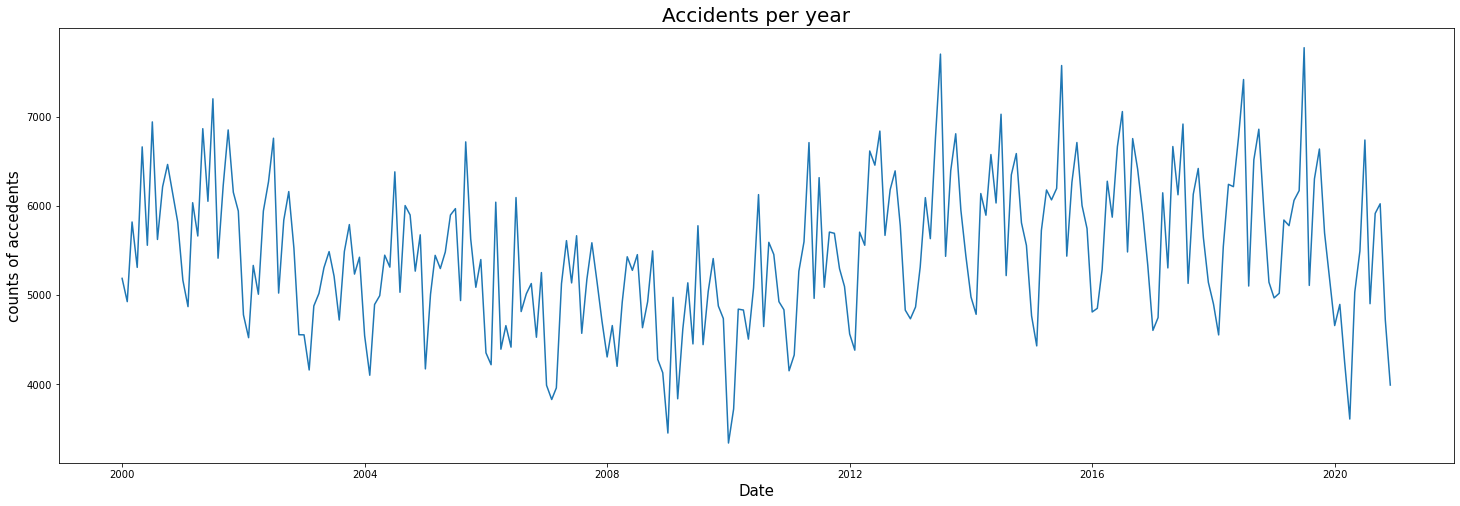

In [41]:
plt.figure(figsize=(25,8))
plt.plot( df.groupby(by =['date'])['value'].sum())
plt.xlabel('Date', fontsize=15)
plt.ylabel('counts of accedents', fontsize=15)
plt.title('Accidents per year', fontsize=20)


In [28]:
acc_coun_per_month = [i for i in df.groupby(df.month)['value'].sum()]

Text(0.5, 1.0, 'Accidents per months from 2000 to 2020')

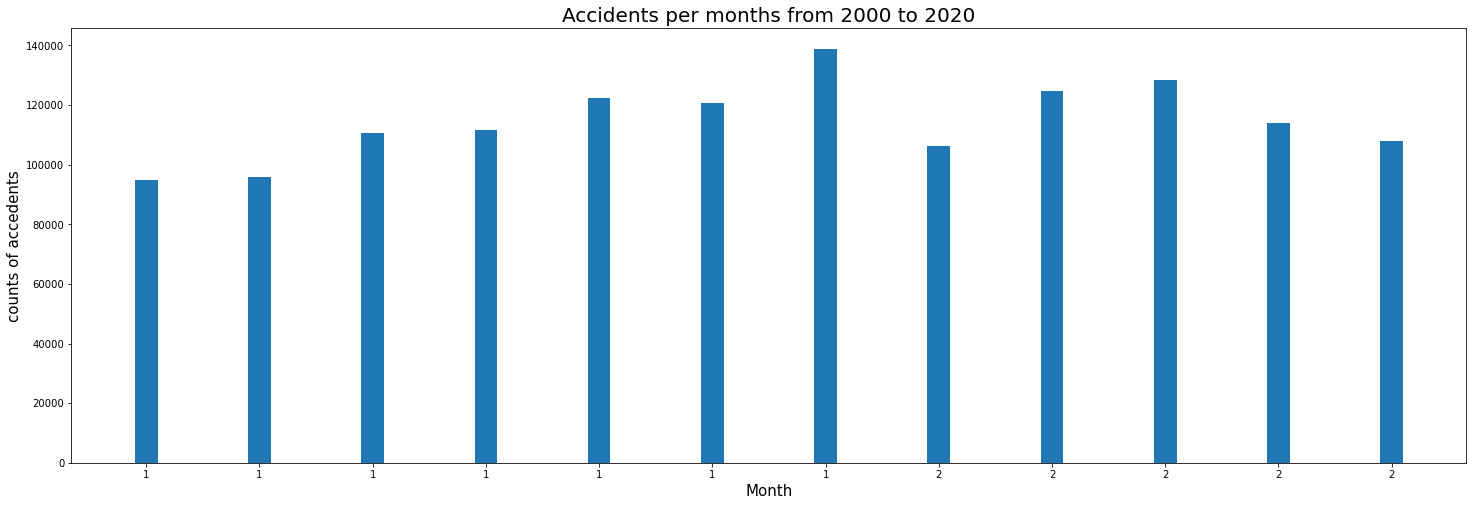

In [42]:
plt.figure(figsize=(25,8))
plt.xticks(range(len(df.month)), df.month)
width = 0.2
plt.bar(np.arange(len(acc_coun_per_month)), acc_coun_per_month, width=width)

plt.xlabel('Month', fontsize=15)
plt.ylabel('counts of accedents', fontsize=15)
plt.title('Accidents per months from 2000 to 2020', fontsize=20)




We notice July month has the highest number of accidents and the least month is Jan

In [30]:
group_df = df.groupby([df.index.year, df.accident_type])['value'].sum()
group_df

date  accident_type         
2000  Verletzte und Getötete     8087
      insgesamt                 56895
      mit Personenschäden        5677
2001  Verletzte und Getötete     8530
      insgesamt                 57957
                                ...  
2019  insgesamt                 58217
      mit Personenschäden        5313
2020  Verletzte und Getötete     6419
      insgesamt                 48888
      mit Personenschäden        4918
Name: value, Length: 63, dtype: int32

In [31]:
df.accident_type.unique()

array(['Verletzte und Getötete', 'mit Personenschäden', 'insgesamt'],
      dtype=object)

In [32]:
Verletzte_ls = [int(group_df[group_df.index[i]]) for i in range(0, len(group_df.index), 3)]

In [33]:
insgesamt_ls = [int(group_df[group_df.index[i]]) for i in range(1, len(group_df.index), 3)]

In [34]:
Personenschäden_ls = [int(group_df[group_df.index[i]]) for i in range(2, len(group_df.index), 3)]

In [35]:
year_ls, acc_type_ls = [], []
for item in group_df.index:
    year, acc_type = item
    year_ls.append(year)
    acc_type_ls.append(acc_type)
year_ls, acc_type_ls
year_ls = [year_ls[i] for i in range(0,len(year_ls), 3)]


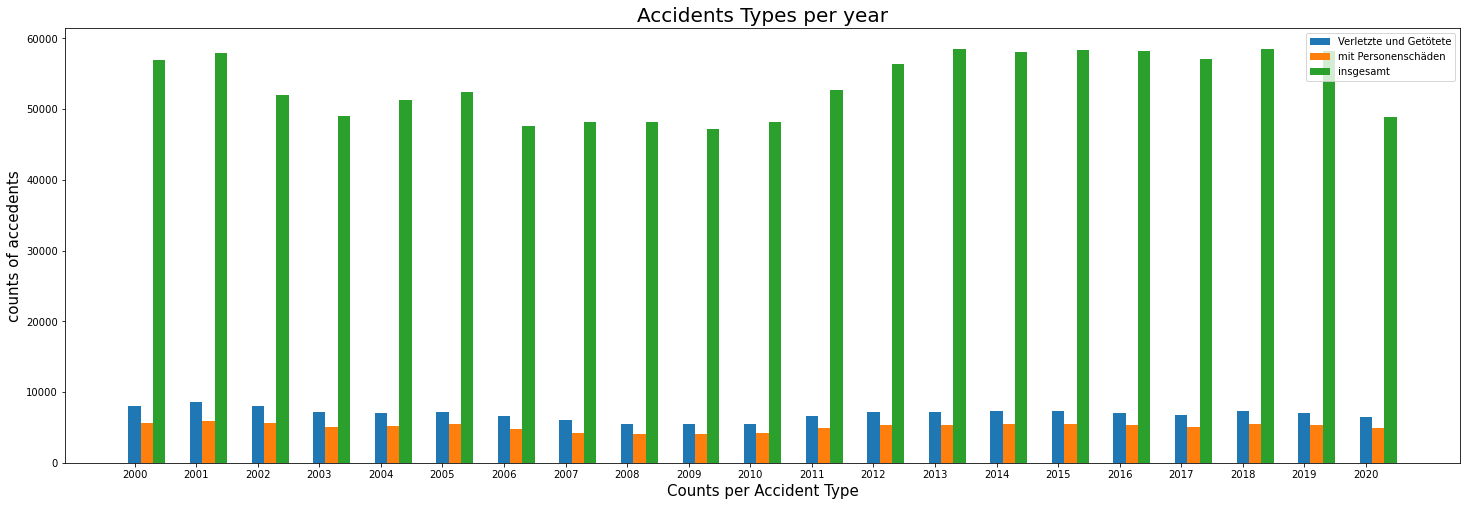

In [45]:
plt.figure(figsize=(25,8))
width =0.2
plt.xticks(range(len(year_ls)), year_ls)

plt.bar(np.arange(len(Verletzte_ls)), Verletzte_ls, width=width)
plt.bar(np.arange(len(Personenschäden_ls))+ width, Personenschäden_ls, width=width)
plt.bar(np.arange(len(insgesamt_ls))+ 2*width, insgesamt_ls, width=width)
plt.xlabel('Counts per Accident Type', fontsize=15)
plt.ylabel('counts of accedents', fontsize=15)
plt.title('Accidents Types per year', fontsize=20)
plt.legend(df.accident_type.unique(),loc=1)


In [37]:
df.groupby(['category', 'accident_type'])['value'].sum()

category         accident_type         
Alkoholunfälle   Verletzte und Getötete      5216
                 insgesamt                  11026
Fluchtunfälle    Verletzte und Getötete     11312
                 insgesamt                 221616
Verkehrsunfälle  Verletzte und Getötete    128906
                 insgesamt                 891374
                 mit Personenschäden       106986
Name: value, dtype: int32

From the above cell, I noticed the 'Verkehrsunfälle' category has the highest number of accidents, and the 'insgesamt' accident type inside it has the highest number of accidents.

## Saving Data

In [46]:
df.to_csv('./data/clean_munich_accidents.csv', index=True)